In [2]:
from sklearn.datasets import load_iris
iris = load_iris()


In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x = iris.feature_names
x

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
y = iris.target_names
y

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
import pandas as pd
import numpy as np
dataset = pd.DataFrame(iris.data,columns=iris.feature_names)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.5, min_samples = 2).fit(dataset)
arr = clustering.labels_
arr

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  4, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  5,  4,
        1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [8]:
dataset['label'] = arr
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [9]:
dataset1 = dataset[dataset['label'] == 0]
dataset2 = dataset[dataset['label'] == 1]
dataset3 = dataset[dataset['label'] == 2]
dataset4 = dataset[dataset['label'] == 3]
dataset5 = dataset[dataset['label'] == 4]
dataset6 = dataset[dataset['label'] == 5]

In [10]:
import matplotlib.pyplot as plt
dataset1.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

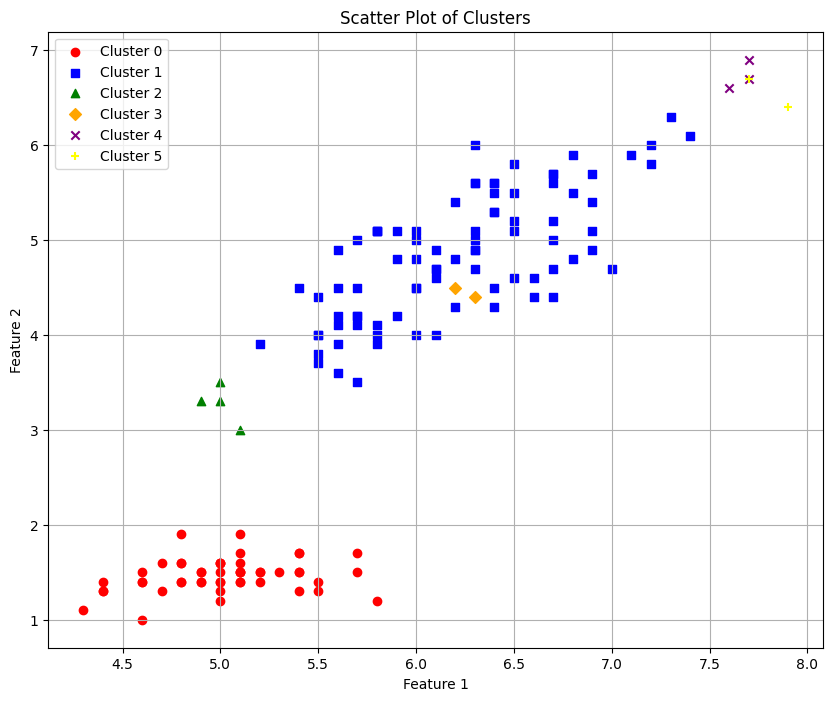

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
markers = ['o', 's', '^', 'D', 'x', '+']

plt.scatter(dataset1['sepal length (cm)'], dataset1['petal length (cm)'], label='Cluster 0', c='red', marker=markers[0])
plt.scatter(dataset2['sepal length (cm)'], dataset2['petal length (cm)'], label='Cluster 1', c='blue', marker=markers[1])
plt.scatter(dataset3['sepal length (cm)'], dataset3['petal length (cm)'], label='Cluster 2', c='green', marker=markers[2])
plt.scatter(dataset4['sepal length (cm)'], dataset4['petal length (cm)'], label='Cluster 3', c='orange', marker=markers[3])
plt.scatter(dataset5['sepal length (cm)'], dataset5['petal length (cm)'], label='Cluster 4', c='purple', marker=markers[4])
plt.scatter(dataset6['sepal length (cm)'], dataset6['petal length (cm)'], label='Cluster 5', c='yellow', marker=markers[5])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Clusters')
plt.legend()
plt.grid()
plt.show()


In [13]:
from sklearn.metrics import silhouette_score
labels = clustering.labels_

# Calculate the silhouette score
score = silhouette_score(dataset, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5383870700486948
